C:\Users\ajed8\AppData\Local\Temp\ipykernel_24900\1534176102.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Grade'], 1))


Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.8661546338965694


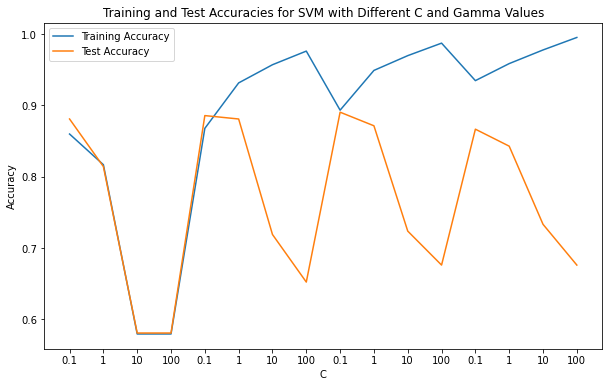

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC

df = pd.read_csv("Cleaned.csv")

X = np.array(df.drop(['Grade'], 1))
y = np.array(df['Grade'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf']}

# Create the SVM classifier
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Iterate over different values of C
for C in param_grid['C']:
    # Iterate over different values of gamma
    for gamma in param_grid['gamma']:
        # Create an SVM classifier with current hyperparameters
        svm = SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

        # Fit the model on the training set
        svm.fit(X_train, y_train)

        # Record training set accuracy
        training_accuracy.append(svm.score(X_train, y_train))

        # Record test set accuracy
        test_accuracy.append(svm.score(X_test, y_test))

# Plot the training and test accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(len(training_accuracy)), training_accuracy, label="Training Accuracy")
plt.plot(range(len(test_accuracy)), test_accuracy, label="Test Accuracy")
plt.xticks(range(len(param_grid['C']) * len(param_grid['gamma'])), param_grid['C'] * len(param_grid['gamma']))
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracies for SVM with Different C and Gamma Values")
plt.legend()
plt.show()


In [3]:
from sklearn.metrics import classification_report

# Fit the model with the best hyperparameters using the training set
best_svm = SVC(**best_params, probability=True)
best_svm.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_svm.predict(X_test)

print("Test Accuracy:", best_svm.score(X_test, y_test))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8809523809523809
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       122
           1       0.82      0.91      0.86        88

    accuracy                           0.88       210
   macro avg       0.88      0.88      0.88       210
weighted avg       0.89      0.88      0.88       210



C:\Users\ajed8\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


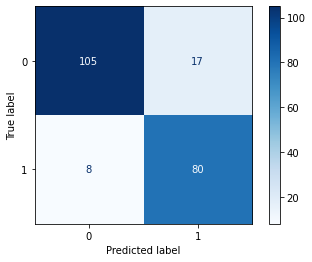

In [12]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_svm, X_test, y_test, cmap=plt.cm.Blues)

plt.show()

In [13]:
import joblib

joblib.dump(best_svm, 'best_svm_model.pkl')

['best_svm_model.pkl']

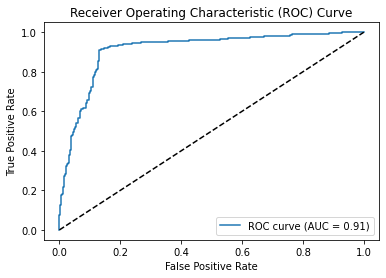

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = best_svm.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
auc = roc_auc_score(y, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()